# Data Science Final Project
**Sara Kiprijanova,**
**Juan Sebastián,**
**Qiang Deng**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import holidays

## 1.Data Exploration & Cleaning

In [2]:
def find_gen(data):
    id_name = data['id'].unique()
    data = data[data['id'] == id_name[1]]
    return data

Function **find_gen** is for cleaning the generation dataset.

The gas price we found on the web: https://www.mibgas.es/es/market-results/price-per-negotiation-session/pvb-spot is daily gas price, thus we set the same value for gas price in the same day.

In [3]:
gas_price = pd.ExcelFile('/kaggle/input/spain-added-data/MIBGAS_Data_2019.xlsx').parse('Trading Data PVB')
gas_price = gas_price[gas_price['Product']== 'GWDES']
gas_price = gas_price.iloc[::-1]

gas_price = list(gas_price['Daily Reference Price\n[EUR/MWh]'])
gas_price_2019 = []
j = 0
for i in range (0, len(gas_price)):
    while j <= 23:
       gas_price_2019.append(gas_price[i])
       j += 1
    j = 0

The code below is for loading the dataset from the input, since we have two different input data file, we create two **datafile_name** to have the dataset names from files.  

In [4]:
datafile_name = ['HourlySpainPrices','Nuclear Generation Spain 2019','HourlyConsumption_in_MW_Spain2019',
                 'Solar Generation Spain 2019','Wind Generation Spain 2019']

datafile2_name = ['balance_france','balance_portugal','biogas','biomass','coal','combined cycle gas turbine',
                  'exchange_total_balance_interconnections','fossil_oil','hydro ugh','turbine pumping']
chart_num = 1
for item in datafile_name:
    globals()['df_%s' % item] = pd.read_csv('/kaggle/input/spain-2019-data-for-data-science-project/' + str(item) + '.csv', delimiter = ';')
    data = globals()['df_%s' % item]
    id_num = len(data['id'].unique())
    if chart_num == 1:
        if id_num != 1:
            data = find_gen(data)
            dataset = pd.DataFrame(data = data['value'].values, index = data['datetime'])
            dataset.rename(columns={dataset.columns.values[0]:item},inplace = True)
            chart_num += 1
        else:
            dataset = pd.DataFrame(data = data['value'].values, index = data['datetime'])
            dataset.rename(columns={dataset.columns.values[0]:item},inplace = True)
                
            chart_num += 1
    else:
        if id_num != 1:
            data = find_gen(data)
            dataset[str(item)] = data['value'].values
        else:
            dataset[str(item)] = data['value'].values

for item in datafile2_name:
    globals()['df_%s' % item] = pd.read_csv('/kaggle/input/spain-added-data/' + str(item) + '.csv', delimiter = ';')
    data = globals()['df_%s' % item]
    id_num = len(data['id'].unique())
    if id_num != 1:
        data = find_gen(data)
        dataset[str(item)] = data['value'].values
    else:
        dataset[str(item)] = data['value'].values

dataset['gas price'] = gas_price_2019

dataset

,HourlySpainPrices,Nuclear Generation Spain 2019,HourlyConsumption_in_MW_Spain2019,Solar Generation Spain 2019,Wind Generation Spain 2019,balance_france,balance_portugal,biogas,biomass,coal,combined cycle gas turbine,exchange_total_balance_interconnections,fossil_oil,hydro ugh,turbine pumping,gas price
datetime,,,,,,,,,,,,,,,,
2019-01-01T00:00:00+01:00,66.88,6047.360,23459.000000,15.986,3794.191,2457.882,15.596,82.823,268.437,1849.879,3137.598,2623.598,219.796,1937.333,-0.642,25.09
2019-01-01T01:00:00+01:00,66.88,6045.900,22781.000000,15.921,3767.804,2418.618,-740.578,84.879,277.258,1631.424,3121.557,2027.690,218.355,1902.241,-0.643,25.09
2019-01-01T02:00:00+01:00,66.00,6046.754,21448.500000,8.272,3757.543,2421.330,-949.526,82.740,279.106,1573.326,3121.121,1856.354,217.256,1230.663,102.975,25.09
2019-01-01T03:00:00+01:00,63.64,6044.538,20262.166667,0.139,3716.763,2405.926,-1383.147,83.095,277.288,1441.022,3609.398,1397.869,218.211,810.054,213.398,25.09
2019-01-01T04:00:00+01:00,58.85,6045.747,19463.500000,0.233,3532.569,2447.541,-1988.196,83.406,276.741,1416.226,3566.925,859.485,209.855,927.679,213.469,25.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31T19:00:00+01:00,46.00,7104.598,30209.833333,4.716,1621.307,2958.146,1280.308,93.786,269.960,386.943,4854.583,4267.474,156.863,6478.350,1373.443,11.65
2019-12-31T20:00:00+01:00,42.58,7103.706,29456.000000,0.049,1609.735,3431.834,623.003,93.628,274.505,387.044,5135.578,4093.877,153.714,6399.114,501.412,11.65
2019-12-31T21:00:00+01:00,39.74,7107.365,27830.333333,0.047,1523.621,3281.760,382.311,92.989,281.131,387.104,4468.096,3706.791,145.424,6224.114,216.831,11.65


## 2. Data visualizaion

We have a dataset containing the electricity price in Spain in 2019 before the influence of factors such as COVID19 or the Russian war, divided by hour, from 1/1/2019 - 31/12/2019. The purpose of this section is to analyse the trend of price changes throughout the year, to be able to understand what kind of trend to expect in the further forecasting, and to have valid data to compare our results to. Therefore, the following observations are obtained:

1. Time-series decomposition: to understand the series trend in price change over the year
2. Montlhy average price - to understand when the price of electricity was highest and lowest
3. Generation power mix in the highest and lowest-price months - to understand what source generates expensive and cheap energy
4. Consumption patterns in highest and lowest-price months - to understand how pce affects consumers

<AxesSubplot:xlabel='datetime'>

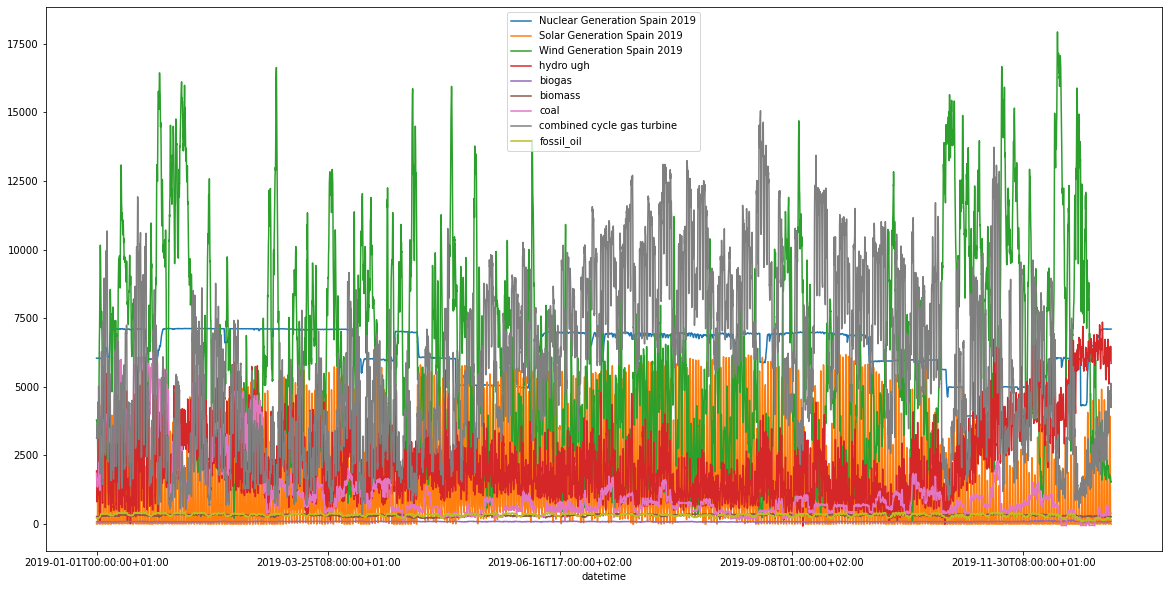

In [5]:
dataset.plot(y=['Nuclear Generation Spain 2019', 'Solar Generation Spain 2019', 'Wind Generation Spain 2019',  'hydro ugh', 'biogas', 'biomass', 'coal', 'combined cycle gas turbine', 'fossil_oil'],
        kind="line", figsize=(20, 10))

<AxesSubplot:xlabel='datetime'>

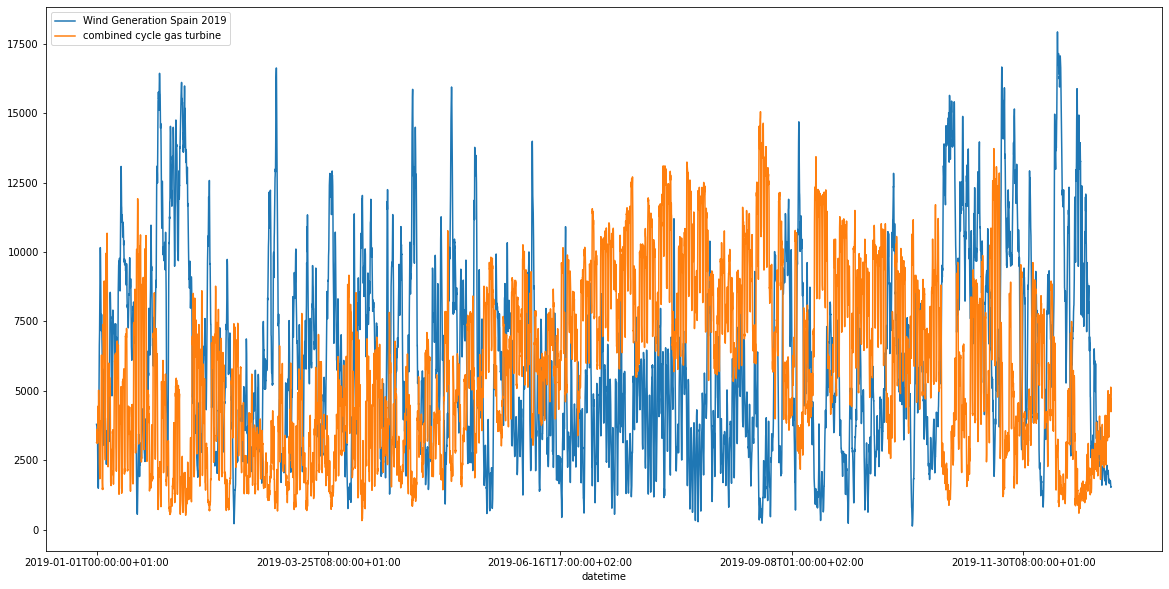

In [6]:
dataset.plot(y=['Wind Generation Spain 2019', 'combined cycle gas turbine'],
        kind="line", figsize=(20, 10))

In [7]:
#Importing of hourly prices from spain in 2019. Values are in EUR/MWh
df_energy = pd.read_csv('/kaggle/input/spain-2019-data-for-data-science-project/HourlySpainPrices.csv', delimiter = ';')

# Checking columns from the original data
df_energy.head()

#From the data acquired we actually only need these two values:
df_hourprice=df_energy[['datetime', 'value']]
df_hourprice.head()

,datetime,value
0,2019-01-01T00:00:00+01:00,66.88
1,2019-01-01T01:00:00+01:00,66.88
2,2019-01-01T02:00:00+01:00,66.00
3,2019-01-01T03:00:00+01:00,63.64
4,2019-01-01T04:00:00+01:00,58.85


In [8]:
df_hourprice.rename(columns={df_hourprice.columns[1]:'Price'}, 
            inplace=True)
df_hourprice.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,datetime,Price
0,2019-01-01T00:00:00+01:00,66.88
1,2019-01-01T01:00:00+01:00,66.88
2,2019-01-01T02:00:00+01:00,66.00
3,2019-01-01T03:00:00+01:00,63.64
4,2019-01-01T04:00:00+01:00,58.85


In [9]:
#Convert the datetime column into a date object
df_hourprice['datetime']=pd.to_datetime(df_hourprice['datetime'], utc=True)

#Set datetime as a Pandas DatetimeIndex
df_hourprice.set_index('datetime', inplace=True)
df_hourprice.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Price
datetime,
2018-12-31 23:00:00+00:00,66.88
2019-01-01 00:00:00+00:00,66.88
2019-01-01 01:00:00+00:00,66.00
2019-01-01 02:00:00+00:00,63.64
2019-01-01 03:00:00+00:00,58.85


In [10]:
print(dataset.head())
print(dataset.shape)
print(dataset.dtypes)

                           HourlySpainPrices  Nuclear Generation Spain 2019  \
datetime                                                                      
2019-01-01T00:00:00+01:00              66.88                       6047.360   
2019-01-01T01:00:00+01:00              66.88                       6045.900   
2019-01-01T02:00:00+01:00              66.00                       6046.754   
2019-01-01T03:00:00+01:00              63.64                       6044.538   
2019-01-01T04:00:00+01:00              58.85                       6045.747   

                           HourlyConsumption_in_MW_Spain2019  \
datetime                                                       
2019-01-01T00:00:00+01:00                       23459.000000   
2019-01-01T01:00:00+01:00                       22781.000000   
2019-01-01T02:00:00+01:00                       21448.500000   
2019-01-01T03:00:00+01:00                       20262.166667   
2019-01-01T04:00:00+01:00                       19463.500000  

[[<AxesSubplot:ylabel='Density'> <AxesSubplot:ylabel='Density'>
  <AxesSubplot:ylabel='Density'> <AxesSubplot:ylabel='Density'>]
 [<AxesSubplot:ylabel='Density'> <AxesSubplot:ylabel='Density'>
  <AxesSubplot:ylabel='Density'> <AxesSubplot:ylabel='Density'>]
 [<AxesSubplot:ylabel='Density'> <AxesSubplot:ylabel='Density'>
  <AxesSubplot:ylabel='Density'> <AxesSubplot:ylabel='Density'>]
 [<AxesSubplot:ylabel='Density'> <AxesSubplot:ylabel='Density'>
  <AxesSubplot:ylabel='Density'> <AxesSubplot:ylabel='Density'>]
 [<AxesSubplot:ylabel='Density'> <AxesSubplot:ylabel='Density'>
  <AxesSubplot:ylabel='Density'> <AxesSubplot:ylabel='Density'>]
 [<AxesSubplot:ylabel='Density'> <AxesSubplot:ylabel='Density'>
  <AxesSubplot:ylabel='Density'> <AxesSubplot:ylabel='Density'>]
 [<AxesSubplot:ylabel='Density'> <AxesSubplot:ylabel='Density'>
  <AxesSubplot:ylabel='Density'> <AxesSubplot:ylabel='Density'>]
 [<AxesSubplot:ylabel='Density'> <AxesSubplot:ylabel='Density'>
  <AxesSubplot:ylabel='Density'> 

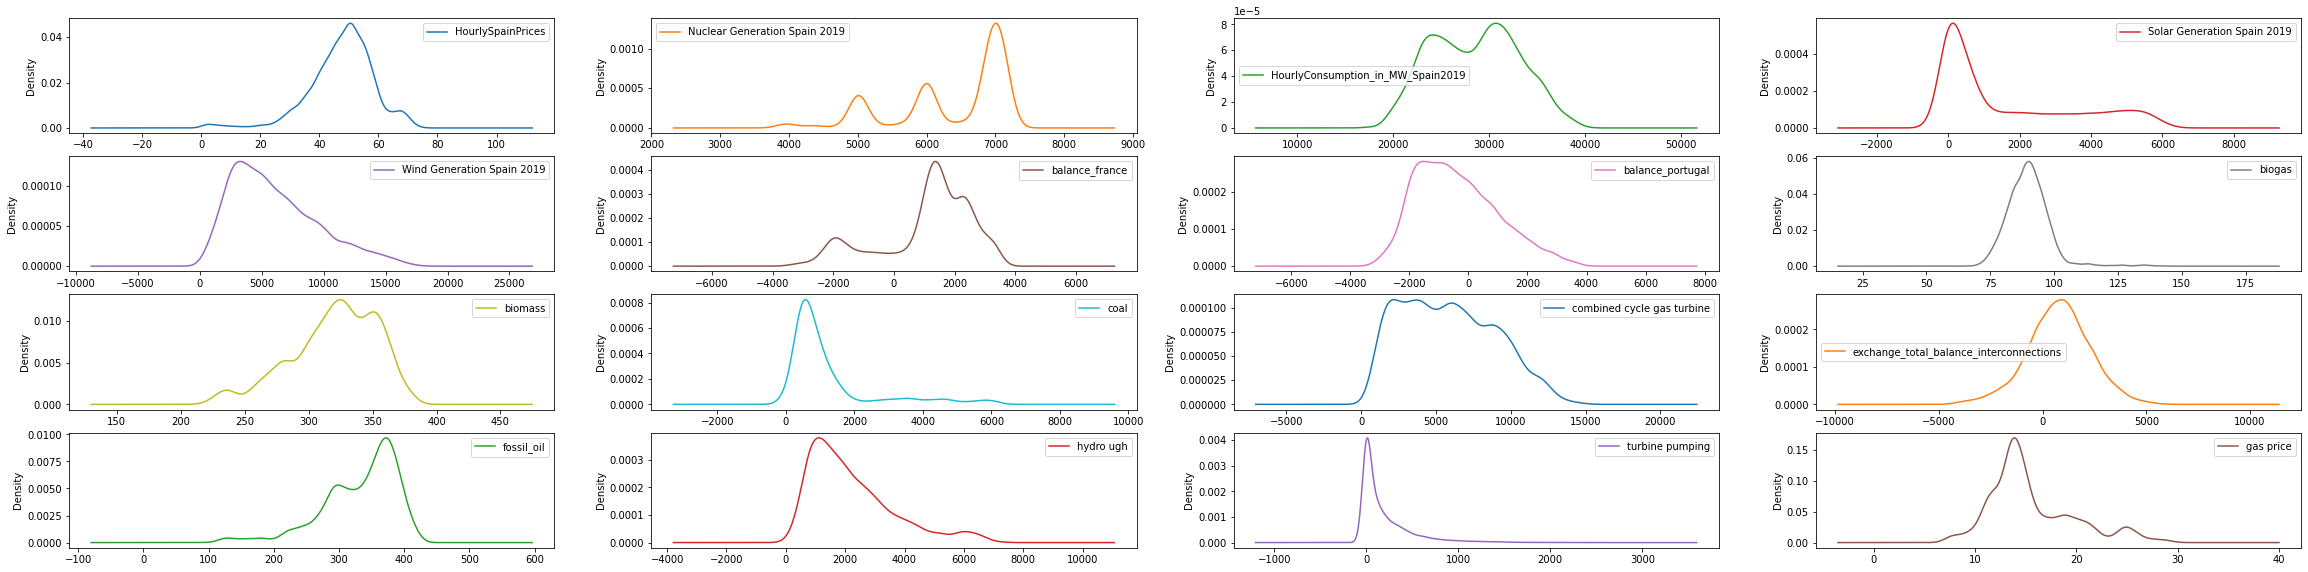

In [11]:
df_Densities = dataset.plot(kind='kde', subplots=True, legend=True, layout=(10,4), figsize=(40,25),sharex=False, stacked=True)
print(df_Densities)

HourlySpainPrices                             AxesSubplot(0.125,0.816017;0.168478x0.0639831)
Nuclear Generation Spain 2019              AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
HourlyConsumption_in_MW_Spain2019          AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
Solar Generation Spain 2019                AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
Wind Generation Spain 2019                    AxesSubplot(0.125,0.739237;0.168478x0.0639831)
balance_france                             AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
balance_portugal                           AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
biogas                                     AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
biomass                                       AxesSubplot(0.125,0.662458;0.168478x0.0639831)
coal                                       AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
combined cycle gas turbine                 AxesSubplot(0.529348,0.6624

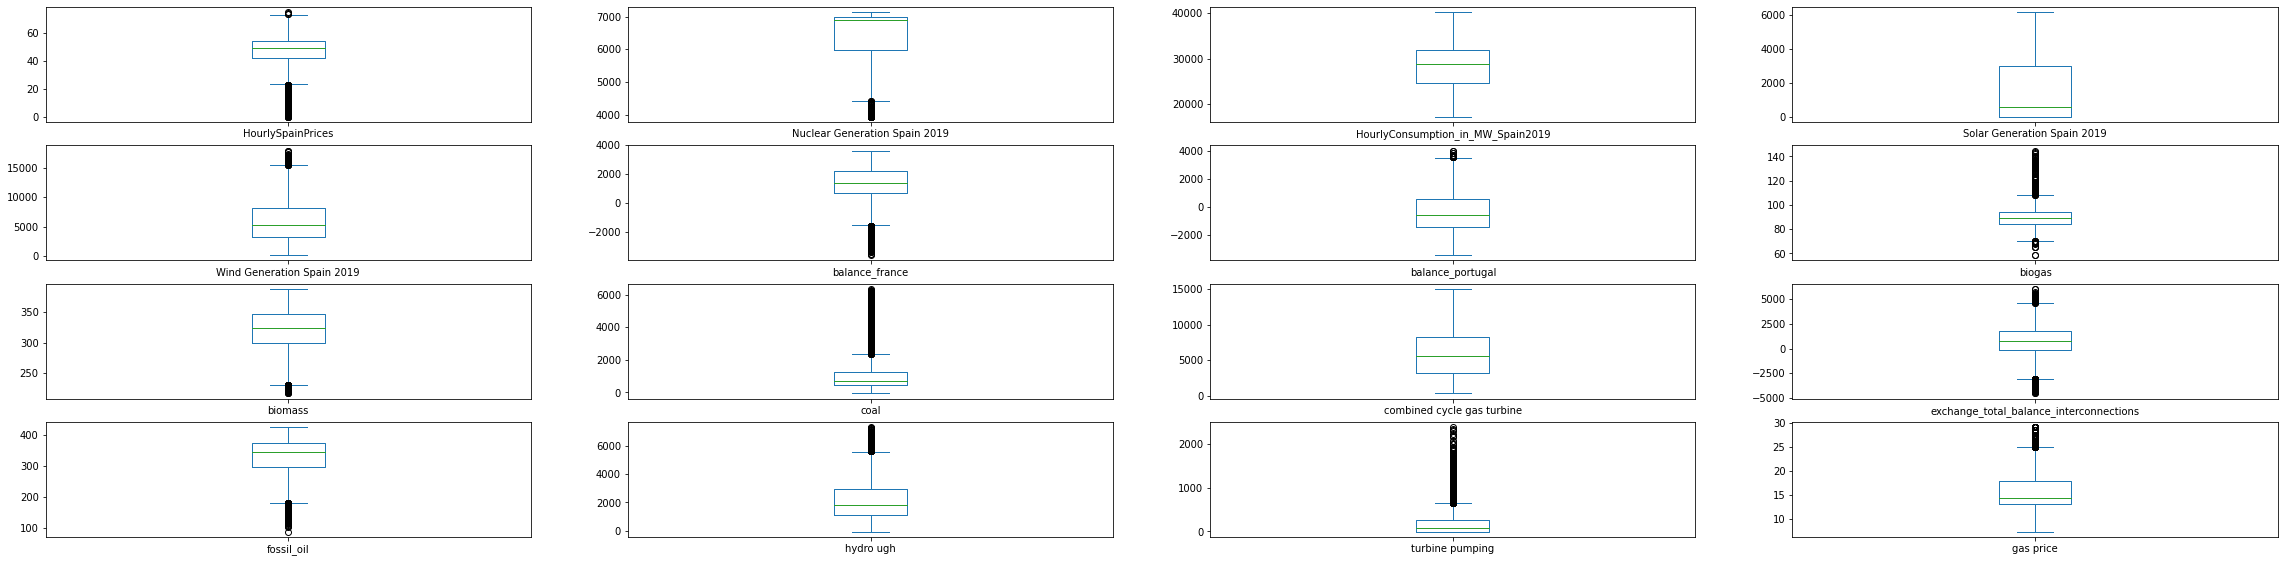

In [12]:
df_Boxes= dataset.plot(kind='box', subplots=True, layout=(10,4), figsize=(40,25), sharex=False, sharey=False)
print(df_Boxes)

[[<AxesSubplot:title={'center':'HourlySpainPrices'}>
  <AxesSubplot:title={'center':'Nuclear Generation Spain 2019'}>
  <AxesSubplot:title={'center':'HourlyConsumption_in_MW_Spain2019'}>
  <AxesSubplot:title={'center':'Solar Generation Spain 2019'}>]
 [<AxesSubplot:title={'center':'Wind Generation Spain 2019'}>
  <AxesSubplot:title={'center':'balance_france'}>
  <AxesSubplot:title={'center':'balance_portugal'}>
  <AxesSubplot:title={'center':'biogas'}>]
 [<AxesSubplot:title={'center':'biomass'}>
  <AxesSubplot:title={'center':'coal'}>
  <AxesSubplot:title={'center':'combined cycle gas turbine'}>
  <AxesSubplot:title={'center':'exchange_total_balance_interconnections'}>]
 [<AxesSubplot:title={'center':'fossil_oil'}>
  <AxesSubplot:title={'center':'hydro ugh'}>
  <AxesSubplot:title={'center':'turbine pumping'}>
  <AxesSubplot:title={'center':'gas price'}>]]


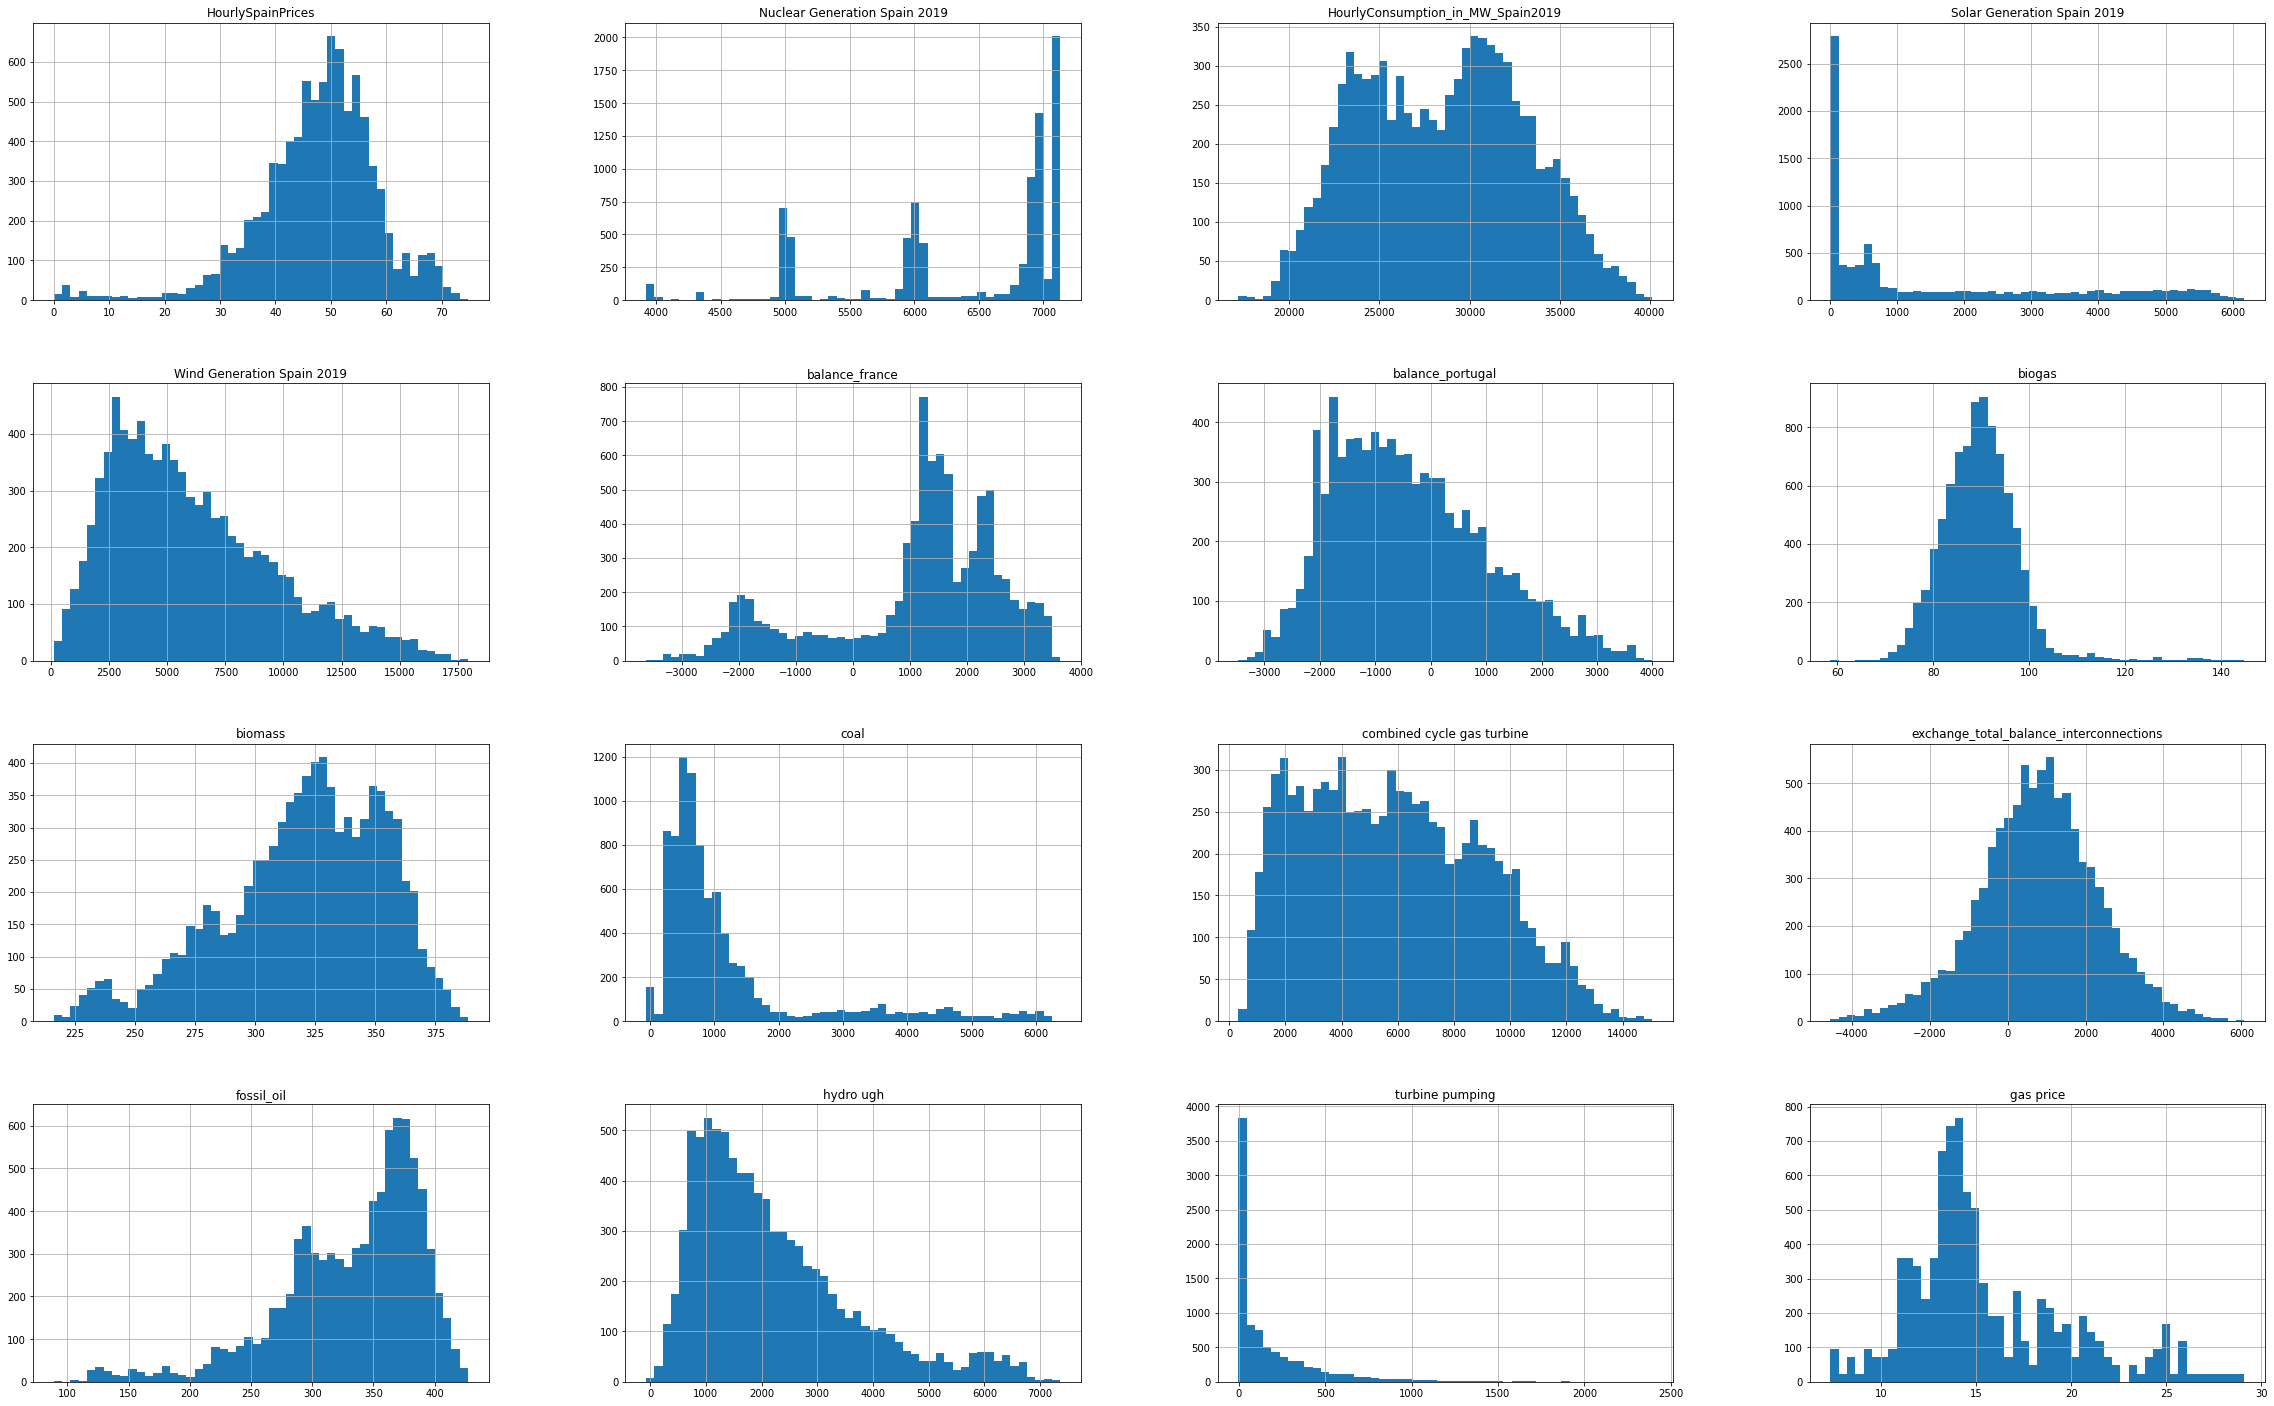

In [13]:
df_histogram = dataset.hist(xlabelsize=10, ylabelsize=10, bins=50, figsize=(40, 25))
print(df_histogram)

## 3. Feature Engineering

In [14]:
hour = []
dayofweek = []
dataset = dataset.reset_index()
for i in range(0,len(dataset)):#because the datatime data we have in the dataset is not the format can be processed by the dt library, here is a transfomation loop
    hour1 = pd.Series(pd.to_datetime(dataset['datetime'][i][0:19].replace('T',' '))).dt.hour
    dayofweek1 = pd.Series(pd.to_datetime(dataset['datetime'][i][0:19].replace('T',' '))).dt.dayofweek
    hour.append(hour1[0])
    dayofweek.append(dayofweek1[0])
    
dataset['Hour_of_day'] = hour
dataset['Day_of_week'] = dayofweek
dataset = dataset.set_index('datetime')
dataset['Holidays'] = pd.Series(pd.to_datetime(dataset.index)).apply(lambda x: holidays.CountryHoliday('ES').get(x)).values
dataset['Holidays'] = dataset['Holidays'].astype('bool').astype('int')
dataset

,HourlySpainPrices,Nuclear Generation Spain 2019,HourlyConsumption_in_MW_Spain2019,Solar Generation Spain 2019,Wind Generation Spain 2019,balance_france,balance_portugal,biogas,biomass,coal,combined cycle gas turbine,exchange_total_balance_interconnections,fossil_oil,hydro ugh,turbine pumping,gas price,Hour_of_day,Day_of_week,Holidays
datetime,,,,,,,,,,,,,,,,,,,
2019-01-01T00:00:00+01:00,66.88,6047.360,23459.000000,15.986,3794.191,2457.882,15.596,82.823,268.437,1849.879,3137.598,2623.598,219.796,1937.333,-0.642,25.09,0,1,1
2019-01-01T01:00:00+01:00,66.88,6045.900,22781.000000,15.921,3767.804,2418.618,-740.578,84.879,277.258,1631.424,3121.557,2027.690,218.355,1902.241,-0.643,25.09,1,1,1
2019-01-01T02:00:00+01:00,66.00,6046.754,21448.500000,8.272,3757.543,2421.330,-949.526,82.740,279.106,1573.326,3121.121,1856.354,217.256,1230.663,102.975,25.09,2,1,1
2019-01-01T03:00:00+01:00,63.64,6044.538,20262.166667,0.139,3716.763,2405.926,-1383.147,83.095,277.288,1441.022,3609.398,1397.869,218.211,810.054,213.398,25.09,3,1,1
2019-01-01T04:00:00+01:00,58.85,6045.747,19463.500000,0.233,3532.569,2447.541,-1988.196,83.406,276.741,1416.226,3566.925,859.485,209.855,927.679,213.469,25.09,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31T19:00:00+01:00,46.00,7104.598,30209.833333,4.716,1621.307,2958.146,1280.308,93.786,269.960,386.943,4854.583,4267.474,156.863,6478.350,1373.443,11.65,19,1,0
2019-12-31T20:00:00+01:00,42.58,7103.706,29456.000000,0.049,1609.735,3431.834,623.003,93.628,274.505,387.044,5135.578,4093.877,153.714,6399.114,501.412,11.65,20,1,0
2019-12-31T21:00:00+01:00,39.74,7107.365,27830.333333,0.047,1523.621,3281.760,382.311,92.989,281.131,387.104,4468.096,3706.791,145.424,6224.114,216.831,11.65,21,1,0


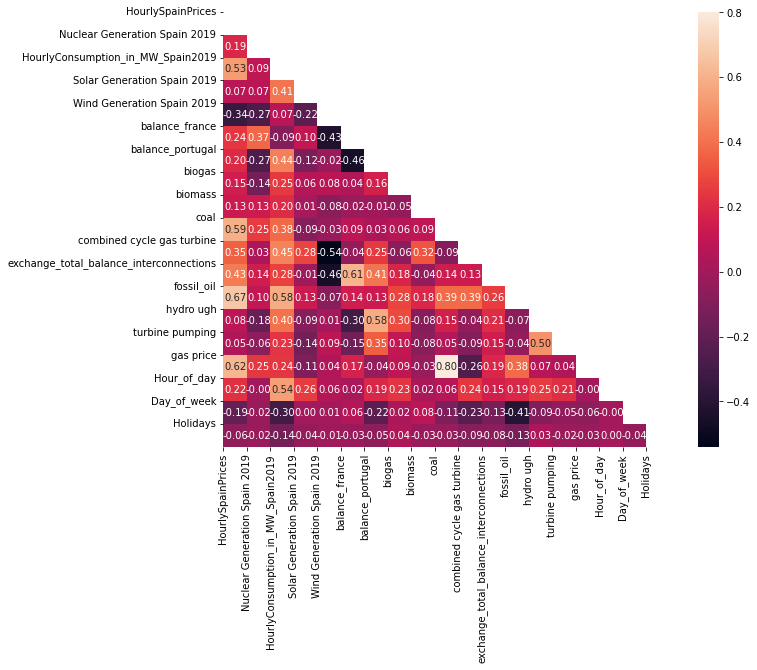

In [15]:
import seaborn as sns
corr = dataset.corr(method='pearson') 
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)  
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

The time-series data composition analysis, the links below are the reference websites: 
1. https://spureconomics.com/interpreting-acf-and-pacf-plots/
2. https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf/notebook

We want to look at whether the monthly electricity price displays seasonality and a trend - therefore we use the seasonal_decompose() function. This function breaks down a time series into 3 components: trend, seasonality, and random noise.

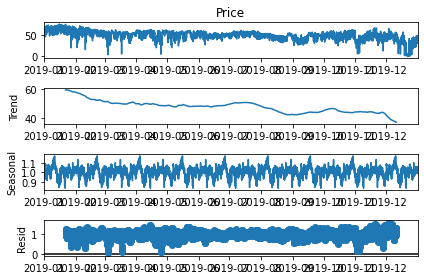

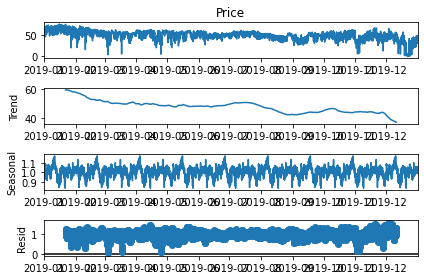

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
series = df_hourprice['Price']
result = seasonal_decompose(series, model='multiplicative', period=1000)
result.plot()

From the obtained results, looking at the Trend component it can be concluded that the price tends to decrease as the year progresses. However, there is a pattern in price high peaks approximatelly every 45 days and low peaks a few times a month, which shows that the price fluctuates a lot on a daily basis.

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


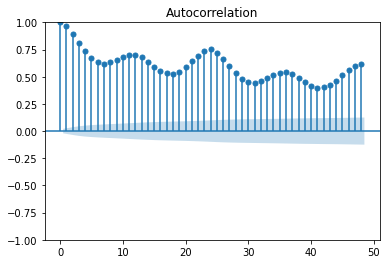

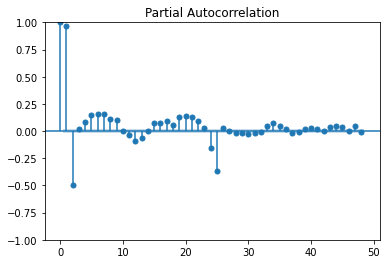

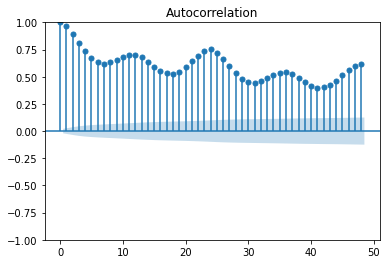

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

sm.graphics.tsa.plot_pacf(dataset['HourlySpainPrices'],lags = 48)
plot_acf(dataset['HourlySpainPrices'],lags = 48)

After we found the specific lag number which has a strong relationship with the true value, we choose the attributes with high correlation scores to do the lagging processing.

In [18]:
dataset['demand_2day_lag'] = dataset['HourlyConsumption_in_MW_Spain2019'].shift(48)
dataset['demand_1week_lag'] = dataset['HourlyConsumption_in_MW_Spain2019'].shift(168)

dataset['demand_2day_mean'] = dataset['HourlyConsumption_in_MW_Spain2019'].rolling(window = 48).mean()
dataset['demand_1week_mean'] = dataset['HourlyConsumption_in_MW_Spain2019'].rolling(window = 168).mean()

dataset['demand_2day_std'] = dataset['HourlyConsumption_in_MW_Spain2019'].rolling(window = 48).std()
dataset['demand_1week_std'] = dataset['HourlyConsumption_in_MW_Spain2019'].rolling(window = 168).std()

dataset['fossil_2day_lag'] = dataset['fossil_oil'].shift(48)
dataset['fossil_1week_lag'] = dataset['fossil_oil'].shift(168)

dataset['fossil_2day_mean'] = dataset['fossil_oil'].rolling(window = 48).mean()
dataset['fossil_1week_mean'] = dataset['fossil_oil'].rolling(window = 168).mean()

dataset['fossil_2day_std'] = dataset['fossil_oil'].rolling(window = 48).std()
dataset['fossil_1week_std'] = dataset['fossil_oil'].rolling(window = 168).std()

dataset['coal_2day_lag'] = dataset['coal'].shift(48)
dataset['coal_1week_lag'] = dataset['coal'].shift(168)

dataset['coal_2day_mean'] = dataset['coal'].rolling(window = 48).mean()
dataset['coal_1week_mean'] = dataset['coal'].rolling(window = 168).mean()

dataset['coal_2day_std'] = dataset['coal'].rolling(window = 48).std()
dataset['coal_1week_std'] = dataset['coal'].rolling(window = 168).std()

dataset['price_1day_lag'] = dataset['HourlySpainPrices'].shift(24)
dataset['price_2day_lag'] = dataset['HourlySpainPrices'].shift(48)
dataset['price_1week_lag'] = dataset['HourlySpainPrices'].shift(168)

dataset['price_1day_mean'] = dataset['HourlySpainPrices'].rolling(window = 24).mean()
dataset['price_2day_mean'] = dataset['HourlySpainPrices'].rolling(window = 48).mean()
dataset['price_1week_mean'] = dataset['HourlySpainPrices'].rolling(window = 168).mean()

dataset['price_1day_std'] = dataset['HourlySpainPrices'].rolling(window = 24).std()
dataset['price_2day_std'] = dataset['HourlySpainPrices'].rolling(window = 48).std()
dataset['price_1week_std'] = dataset['HourlySpainPrices'].rolling(window = 168).std()

dataset['gas_price_1day_lag'] = dataset['gas price'].shift(24)
dataset['gas_price_2day_lag'] = dataset['gas price'].shift(48)
dataset['gas_price_1week_lag'] = dataset['gas price'].shift(168)

dataset['gas_price_1day_mean'] = dataset['gas price'].rolling(window = 24).mean()
dataset['gas_price_2day_mean'] = dataset['gas price'].rolling(window = 48).mean()
dataset['gas_price_1week_mean'] = dataset['gas price'].rolling(window = 168).mean()

dataset['gas_price_1day_std'] = dataset['gas price'].rolling(window = 24).std()
dataset['gas_price_2day_std'] = dataset['gas price'].rolling(window = 48).std()
dataset['gas_price_1week_std'] = dataset['gas price'].rolling(window = 168).std()

dataset

,HourlySpainPrices,Nuclear Generation Spain 2019,HourlyConsumption_in_MW_Spain2019,Solar Generation Spain 2019,Wind Generation Spain 2019,balance_france,balance_portugal,biogas,biomass,coal,...,price_1week_std,gas_price_1day_lag,gas_price_2day_lag,gas_price_1week_lag,gas_price_1day_mean,gas_price_2day_mean,gas_price_1week_mean,gas_price_1day_std,gas_price_2day_std,gas_price_1week_std
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01T00:00:00+01:00,66.88,6047.360,23459.000000,15.986,3794.191,2457.882,15.596,82.823,268.437,1849.879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01T01:00:00+01:00,66.88,6045.900,22781.000000,15.921,3767.804,2418.618,-740.578,84.879,277.258,1631.424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01T02:00:00+01:00,66.00,6046.754,21448.500000,8.272,3757.543,2421.330,-949.526,82.740,279.106,1573.326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01T03:00:00+01:00,63.64,6044.538,20262.166667,0.139,3716.763,2405.926,-1383.147,83.095,277.288,1441.022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01T04:00:00+01:00,58.85,6045.747,19463.500000,0.233,3532.569,2447.541,-1988.196,83.406,276.741,1416.226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31T19:00:00+01:00,46.00,7104.598,30209.833333,4.716,1621.307,2958.146,1280.308,93.786,269.960,386.943,...,11.013671,12.82,13.74,8.51,11.84500,12.409167,10.656667,0.445411,0.694384,2.250850
2019-12-31T20:00:00+01:00,42.58,7103.706,29456.000000,0.049,1609.735,3431.834,623.003,93.628,274.505,387.044,...,11.053139,12.82,13.74,8.51,11.79625,12.365625,10.675357,0.395263,0.674398,2.245950
2019-12-31T21:00:00+01:00,39.74,7107.365,27830.333333,0.047,1523.621,3281.760,382.311,92.989,281.131,387.104,...,11.079569,12.82,13.74,8.51,11.74750,12.322083,10.694048,0.330326,0.650832,2.240882


## 4. Forecasting

##### In this part, I pretty much followed the process from Assignment 1, the only extra work I did is adding the AdaboostRegression with the final_model as the basic model inside of it. The prediction results seems better. You can Google to understand how the Adaboost work in this way.

In [19]:
dataset = dataset.iloc [ 168 : , : ]# drop the NaN values created by the lagging
dataset

,HourlySpainPrices,Nuclear Generation Spain 2019,HourlyConsumption_in_MW_Spain2019,Solar Generation Spain 2019,Wind Generation Spain 2019,balance_france,balance_portugal,biogas,biomass,coal,...,price_1week_std,gas_price_1day_lag,gas_price_2day_lag,gas_price_1week_lag,gas_price_1day_mean,gas_price_2day_mean,gas_price_1week_mean,gas_price_1day_std,gas_price_2day_std,gas_price_1week_std
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-08T00:00:00+01:00,59.59,7108.678,28285.166667,19.398,6371.873,2336.191,-567.304,82.895,294.293,4089.614,...,6.546681,25.00,24.85,25.09,25.028333,24.942292,25.487798,0.138804,0.132090,1.138938
2019-01-08T01:00:00+01:00,54.34,7105.749,26095.500000,19.596,6220.059,2078.261,-1051.143,82.031,289.218,3660.948,...,6.575732,25.00,24.85,25.09,25.056667,24.959583,25.491310,0.191984,0.168939,1.138613
2019-01-08T02:00:00+01:00,52.10,7104.943,24854.166667,19.639,6307.788,2067.655,-1157.562,82.130,291.955,3309.979,...,6.626418,25.00,24.85,25.09,25.085000,24.976875,25.494821,0.229726,0.197540,1.138278
2019-01-08T03:00:00+01:00,50.71,7107.104,24221.666667,19.437,6646.417,2079.302,-1338.447,83.935,289.234,3174.301,...,6.694016,25.00,24.85,25.09,25.113333,24.994167,25.498333,0.258872,0.221117,1.137932
2019-01-08T04:00:00+01:00,50.50,7105.968,24358.833333,19.753,6902.324,2054.811,-1044.347,83.269,292.036,2948.848,...,6.755369,25.00,24.85,25.09,25.141667,25.011458,25.501845,0.282099,0.241150,1.137574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31T19:00:00+01:00,46.00,7104.598,30209.833333,4.716,1621.307,2958.146,1280.308,93.786,269.960,386.943,...,11.013671,12.82,13.74,8.51,11.845000,12.409167,10.656667,0.445411,0.694384,2.250850
2019-12-31T20:00:00+01:00,42.58,7103.706,29456.000000,0.049,1609.735,3431.834,623.003,93.628,274.505,387.044,...,11.053139,12.82,13.74,8.51,11.796250,12.365625,10.675357,0.395263,0.674398,2.245950
2019-12-31T21:00:00+01:00,39.74,7107.365,27830.333333,0.047,1523.621,3281.760,382.311,92.989,281.131,387.104,...,11.079569,12.82,13.74,8.51,11.747500,12.322083,10.694048,0.330326,0.650832,2.240882


In [20]:
X = dataset.drop(['HourlySpainPrices'], axis=1) # Attributes
y = dataset['HourlySpainPrices'] # Targets

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_df = X.copy()
X_scaled = pd.DataFrame(scaler.fit_transform(X_df))
X_scaled.columns = X_df.columns
X_scaled

,Nuclear Generation Spain 2019,HourlyConsumption_in_MW_Spain2019,Solar Generation Spain 2019,Wind Generation Spain 2019,balance_france,balance_portugal,biogas,biomass,coal,combined cycle gas turbine,...,price_1week_std,gas_price_1day_lag,gas_price_2day_lag,gas_price_1week_lag,gas_price_1day_mean,gas_price_2day_mean,gas_price_1week_mean,gas_price_1day_std,gas_price_2day_std,gas_price_1week_std
0,0.993588,0.483932,0.003136,0.350652,0.821060,0.388813,0.282123,0.453067,0.644924,0.180324,...,0.254255,0.811208,0.804318,0.815342,0.812510,0.820074,0.932614,6.710217e-02,0.058445,0.357432
1,0.992674,0.388688,0.003168,0.342126,0.785576,0.324041,0.272119,0.423636,0.578336,0.171580,...,0.256118,0.811208,0.804318,0.815342,0.813811,0.820883,0.932813,9.281090e-02,0.074750,0.357309
2,0.992423,0.334694,0.003175,0.347053,0.784117,0.309794,0.273265,0.439509,0.523817,0.136840,...,0.259370,0.811208,0.804318,0.815342,0.815113,0.821692,0.933013,1.110562e-01,0.087405,0.357183
3,0.993097,0.307182,0.003142,0.366069,0.785719,0.285579,0.294165,0.423729,0.502741,0.120849,...,0.263706,0.811208,0.804318,0.815342,0.816414,0.822500,0.933212,1.251462e-01,0.097837,0.357052
4,0.992742,0.313148,0.003193,0.380440,0.782350,0.324950,0.286454,0.439978,0.467720,0.130448,...,0.267642,0.811208,0.804318,0.815342,0.817716,0.823309,0.933411,1.363749e-01,0.106701,0.356917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,0.992315,0.567648,0.000759,0.083872,0.906623,0.636156,0.408230,0.311956,0.069758,0.307412,...,0.540817,0.251723,0.293983,0.053744,0.206936,0.234004,0.091302,2.153251e-01,0.307243,0.777278
8588,0.992037,0.534859,0.000004,0.083223,0.971788,0.548162,0.406401,0.338313,0.069774,0.326482,...,0.543349,0.251723,0.293983,0.053744,0.204697,0.231968,0.092362,1.910820e-01,0.298400,0.775427
8589,0.993178,0.464148,0.000004,0.078387,0.951143,0.515940,0.399002,0.376738,0.069783,0.281182,...,0.545045,0.251723,0.293983,0.053744,0.202458,0.229931,0.093422,1.596893e-01,0.287973,0.773514
8590,0.993030,0.357566,0.000002,0.079455,0.608119,0.581032,0.382467,0.350804,0.070231,0.266349,...,0.545760,0.251723,0.293983,0.053744,0.200218,0.227895,0.094483,1.154552e-01,0.275783,0.771536


In [22]:
scaler_y = MinMaxScaler()

y_df = y.copy()
y_df = pd.DataFrame(y_df)
y_scaled = scaler_y.fit_transform(y_df)
y_scaled = np.ravel(y_scaled)
#y_scaled.set_index(y.index.values)
y_scaled

array([0.7972159 , 0.72694418, 0.69696158, ..., 0.53152188, 0.52001071,
       0.49979922])

In [23]:
from sklearn.model_selection import train_test_split

test_size = 0.2

X_train = X_scaled[:(len(X_scaled)-24)]
y_train = y_scaled[:(len(X_scaled)-24)]

X_test = X_scaled[-24:]
y_test = y_scaled[-24:]

X_train, X_val, y_train , y_val = train_test_split(X_train, y_train, test_size=test_size,
                                                    shuffle=False)

In [24]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
#import lightgbm as ltb

num_folds = 5
error_metrics = {'neg_root_mean_squared_error', 'r2'}
models = {('MLP', MLPRegressor()),('RFR', RandomForestRegressor()),
          ('SVR', SVR()),
          ('XGBRegressor',XGBRegressor()),
          ('KN',KNeighborsRegressor()),
          ('GBR',GradientBoostingRegressor())}

Evaluation metric:  neg_root_mean_squared_error
Model  XGBRegressor
Model  RFR
Model  SVR
Model  MLP
Model  GBR
Model  KN
[('XGBRegressor', -0.06158794820377171, 0.02476826191851119), ('RFR', -0.061584853402781845, 0.026843487038313844), ('SVR', -0.07514941043423307, 0.047675554781807475), ('MLP', -0.05843559670767991, 0.01686343710560025), ('GBR', -0.05840459839405656, 0.02531310404216193), ('KN', -0.08540787751997812, 0.026156096796910014)]


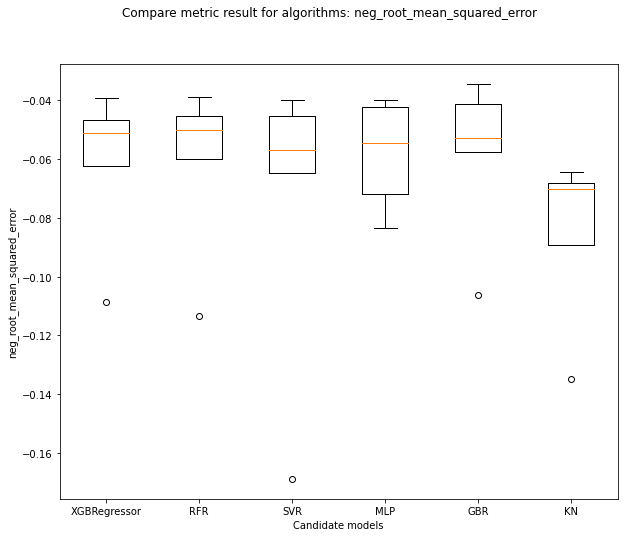

Evaluation metric:  r2
Model  XGBRegressor
Model  RFR
Model  SVR
Model  MLP
Model  GBR
Model  KN
[('XGBRegressor', 0.6499310818032494, 0.14705186628438868), ('RFR', 0.650281439614838, 0.18429121604533757), ('SVR', 0.4475710063633831, 0.5010579819862475), ('MLP', 0.647328971226904, 0.06834601525509719), ('GBR', 0.6715593688485533, 0.1738678667620078), ('KN', 0.31174276901830167, 0.183980729629507)]


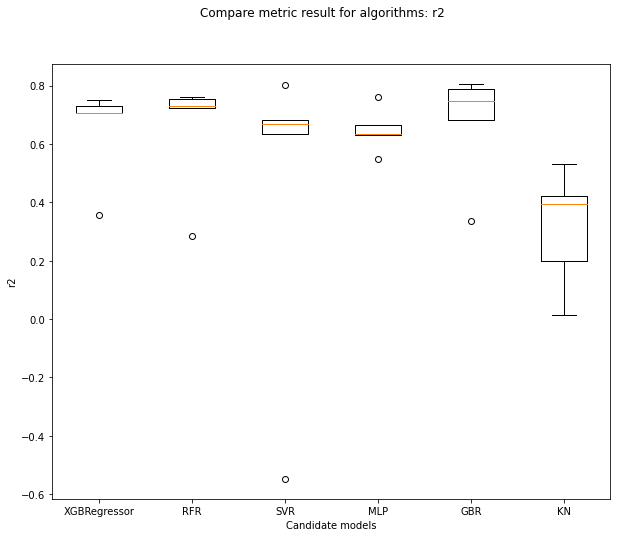

In [25]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
plt.rcParams["figure.figsize"] = (10,8)
# Cross-validation training
for scoring in error_metrics:
    results = [] # store metrics results
    msg = []  # print summary of result
    names = []  # store name of the models
    print('Evaluation metric: ', scoring)
    for name, model in models:
        print('Model ', name)
        cross_validation = KFold(n_splits=num_folds, shuffle=False)
        cv_results = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    print(msg)

    # Compare results between algorithms
    fig = plt.figure()
    fig.suptitle('Compare metric result for algorithms: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Candidate models')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

    results = []

### Hyperparameter Optimazation
As the results shown in the boxplot above, Gradient Boosting Regressor has the best score compare with other models. 

In [26]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
model_1 = GradientBoostingRegressor()
scoring='r2'
parameters = {'learning_rate': sp_randFloat(),
                  'subsample'    : sp_randFloat(),
                  'n_estimators' : sp_randInt(100, 1000),
                  'max_depth'    : sp_randInt(4, 10)
                 }


cross_validation = KFold(n_splits=5, shuffle=False)
my_cv = cross_validation.split(X_val)
Rsearch = RandomizedSearchCV(estimator=model_1, param_distributions = parameters ,scoring=scoring, cv=my_cv)
Rsearch.fit(X_val, y_val)

print("Best result: %f using the following hyperparameters %s" % (Rsearch.best_score_, Rsearch.best_params_))
means = Rsearch.cv_results_['mean_test_score']
stds = Rsearch.cv_results_['std_test_score']
params = Rsearch.cv_results_['params']

Best result: 0.666890 using the following hyperparameters {'learning_rate': 0.15869805625356725, 'max_depth': 4, 'n_estimators': 966, 'subsample': 0.7382503792755805}


In [27]:
final_model_1 = GradientBoostingRegressor(learning_rate = Rsearch.best_params_['learning_rate'], max_depth = Rsearch.best_params_['max_depth'], n_estimators = Rsearch.best_params_['n_estimators'], subsample = Rsearch.best_params_['subsample'])
final_model_1.fit(X_train,y_train)  
y_predict_1 = final_model.predict(X_test)  

NameError: name 'final_model' is not defined

In [ ]:
import math 
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def MAPE(y_test_inv,y_predict_inv):
    mape = np.mean(np.abs((y_test_inv - y_predict_inv)/y_test_inv))*100
    return mape
    
y_test_unsc = np.reshape(y_test, (len(y_test), 1))
y_test_inv = scaler_y.inverse_transform(y_test_unsc)

y_predict_uns_1 = np.reshape(y_predict_1, (len(y_predict_1), 1))
y_predict_inv_1 = scaler_y.inverse_transform(y_predict_uns_1)

print('GBR RMSE:',math.sqrt(mean_squared_error(y_test_inv, y_predict_inv_1)))
print('GBR MAE:',mean_absolute_error(y_test_inv, y_predict_inv_1))
print('GBR MAPE:', MAPE(y_test_inv,y_predict_inv_1))

The MAE of the prediction results from the Gradient Boosting Regressor model is 7.88 which is still to high as the final results. Since we are using the model to predict the next 24 data points, we tried the Support Vector Regressor model which is not complicated to do the prediction.

In [ ]:
model_2 = SVR()
scoring='r2'

parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}

cross_validation = KFold(n_splits=5, shuffle=False)
my_cv = cross_validation.split(X_val)
gsearch = GridSearchCV(estimator=model_2, param_grid = parameters, scoring=scoring, cv=my_cv)
gsearch.fit(X_val, y_val)

print("Best result: %f using the following hyperparameters %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']

In [ ]:
final_model_2 = SVR(C = 10, epsilon = 0.1, gamma =1e-7, kernel = 'linear')
final_model_2.fit(X_train,y_train)  
y_predict_2 = final_model.predict(X_test)  
y_predict_2

In [ ]:
y_predict_uns_2 = np.reshape(y_predict_2, (len(y_predict_2), 1))
y_predict_inv_2 = scaler_y.inverse_transform(y_predict_uns_2)

print('RMSE:',math.sqrt(mean_squared_error(y_test_inv, y_predict_inv_2)))
print('MAE:',mean_absolute_error(y_test_inv, y_predict_inv_2))
print('MAPE:', MAPE(y_test_inv,y_predict_inv_2))

In [ ]:
my_ensemble = AdaBoostRegressor(base_estimator = final_model, random_state=None, n_estimators=7, learning_rate=0.7)
my_ensemble.fit(X_train,y_train) 
y_predict = my_ensemble.predict(X_test)

In [ ]:
y_test_unsc = np.reshape(y_test, (len(y_test), 1))
y_test_inv = scaler_y.inverse_transform(y_test_unsc)

y_predict_uns = np.reshape(y_predict, (len(y_predict), 1))
y_predict_inv = scaler_y.inverse_transform(y_predict_uns)

print('RMSE:',math.sqrt(mean_squared_error(y_test_inv, y_predict_inv)))
print('MAE:',mean_absolute_error(y_test_inv, y_predict_inv))
print('MAPE:', MAPE(y_test_inv,y_predict_inv))

## 5. Result Analysis

In [ ]:
x = range(len(y_predict_inv))
plt.figure(figsize=(20,5))
plt.xlabel('Time(Hourly)', size=15)
plt.ylabel('Price (Euros/MWh)', size=15)
plt.plot(x, y_predict_inv, alpha=0.4, color='blue', label='Price predict')
plt.plot(x, y_test_inv, alpha=0.4, color='red',  label='Price real')
plt.title('Prediction vs Real')
plt.legend()
plt.show()

In [ ]:
error = (y_test_inv - y_predict_inv)
plt.figure(figsize=(20,5))
plt.xlabel('Time', size=15)
plt.plot(x, error, alpha=0.4, color='red',  label='Error')
plt.title('Prediction Error')
plt.legend()
plt.show()